# Runs simulations

Descriptive text to be added

### Imports

In [1]:
import math
import random
import matplotlib
import matplotlib.pyplot as plt

from helperfcts import *
from heap import Heap
from randomgraph import RandomGraph

### Experimental parameters

In [44]:
no_agents = 200
H = Heap(no_agents)

graph_size = 1000 # n
edge_probability = 0.5 # p
Gnp = RandomGraph(graph_size, edge_probability)

mu = 0 # average value
sigma = 10 # gaussian noise
clock_rate = 1 # Poisson process for asynchronous agent actions
simulation_time = 100

### Experiment

Initial mean and standard deviation in values are (-0.776, 10.372)
Final mean and standard deviation in values are (-0.776, 0.031)


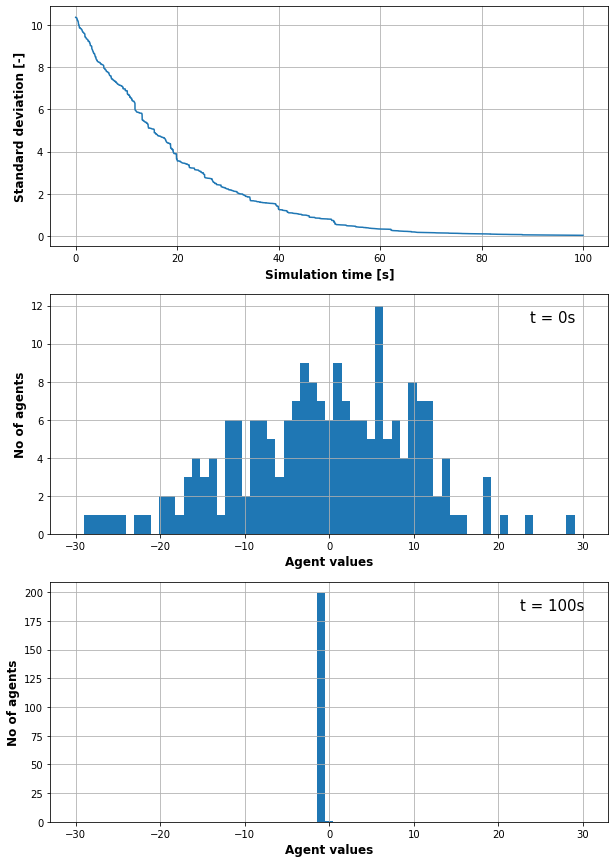

In [45]:
# get agents started
val = []
for uuid in range(no_agents):
    clock = exp_rv(clock_rate)
    pos = random.randint(0, graph_size-1)
    Gnp.agents[pos].add(uuid)
    H.insert(uuid, clock, pos)
    val.append(random.gauss(mu, sigma))
val_0 = val.copy()
mean = sum(val) / no_agents
mean_0 = mean
var = sum([((x - mean) ** 2) for x in val]) / no_agents
std = var ** 0.5
std_rt_val = [std] # val
std_rt_t = [0] # time


# run agents until time t
while True:
    # pop next agent from heap
    (uuid, event_time, pos) = H.delete_min()
    
    # stop simulation if out of time
    if event_time > simulation_time:
        break
    
    # remove current agent from node and pick random agent at same node to average values, update standard deviation
    Gnp.agents[pos].remove(uuid)
    if len(Gnp.agents[pos]):
        neighbor = random.randint(0, len(Gnp.agents[pos]))
        self_val = val[uuid]
        neighbor_val = val[neighbor]
        avg_val = (self_val + neighbor_val) / 2
        val[uuid] = avg_val
        val[neighbor] = avg_val
        
        old_var = std_rt_val[-1] ** 2
        diff = (2*(avg_val - mean_0)**2 - (self_val - mean_0)**2 - (neighbor_val - mean_0)**2) / no_agents
        new_std = abs((old_var + diff)) ** 0.5
        std_rt_val.append(new_std)
        std_rt_t.append(event_time)
    
    # move current agent to random neighboring node
    next_pos_ind = random.randint(0, len(Gnp.graph[pos])-1)
    next_pos = Gnp.graph[pos][next_pos_ind]
    Gnp.agents[next_pos].add(uuid)
    
    # update current agent's clock and insert it in heap
    next_clock = event_time + exp_rv(clock_rate)
    H.insert(uuid, next_clock, next_pos)


# print and plot
analyze_basics(val_0, val, mean_0, std_rt_val, std_rt_t, simulation_time, no_agents)